In [1]:
import pandas as pd

In [2]:
import os
os.listdir()

['Pre-workshop questionnaire – Prefilled form.docx',
 'hazard_importance_violin.ipynb',
 'Pre-workshop questionnaire summary.pptx',
 'questionnaire_for_analysis.xlsx',
 'Pre-workshop questionnaire(1-10).xlsx',
 '.ipynb_checkpoints',
 'hazard_importance_violin.png']

In [3]:
df = pd.read_excel(
"Pre-workshop questionnaire(1-10).xlsx"
    #    "questionnaire_for_analysis.xlsx"
)

df['Wildfire'] = df['Wildfire'].replace('5 (most important)', 5).astype(int)
df['Drought'] = df['Drought'].replace('5 (most important)', 5).astype(int)
df['Insect outbreak'] = df['Insect outbreak'].replace('5 (most important)', 5).astype(int)

/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_10834/2541276736.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Wildfire'] = df['Wildfire'].replace('5 (most important)', 5).astype(int)


In [4]:



df_long = df.melt(
  #  id_vars="Name",
    value_vars=["Drought", "Insect outbreak", "Wildfire"],
    var_name="Hazard",
    value_name="Importance"
)
df_long

,Hazard,Importance
0,Drought,4
1,Drought,4
2,Drought,3
3,Drought,3
4,Insect outbreak,4
5,Insect outbreak,4
6,Insect outbreak,4
7,Insect outbreak,4
8,Wildfire,5
9,Wildfire,5


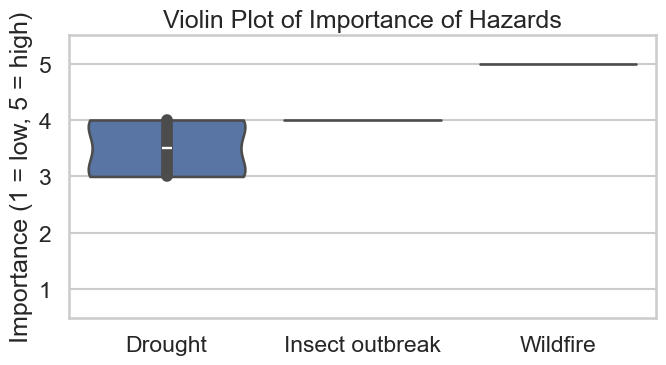

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

sns.set_theme(
    style="whitegrid",
    context="talk",
   # font_scale= 1.2   # increase this to make everything bigger
)

sns.violinplot(
    data=df_long,
    x="Hazard",
    y="Importance",
    inner="box",      # shows median + IQR
    cut=0             # keeps values within 1–5
)

plt.ylim(0.5, 5.5)
plt.ylabel("Importance (1 = low, 5 = high)")
plt.xlabel("")
plt.title("Violin Plot of Importance of Hazards")
plt.tight_layout()


plt.savefig("hazard_importance_violin.png")
plt.show()